# Partial Sensing

# About this file

This file is to use the functionalities of the classes defined in the other file.

## Things to be done here

1) write algorithm for agent3, agent4 <br>
2) if object_matrix is knowledge base, then lets rename it to knowledge base to avoid confusion and have unambiguous variable names.<br>
3) Import A* code into this file.

## Things done here

1) declared the set of global variables required
2) renamed object_matrix to knowledge_base

In [5]:
%run project1.ipynb
%run partial_sensing_agent3.ipynb
import numpy as np
import matplotlib.pyplot as plt


Exception: File `'partial_sensing_agent3.ipynb.py'` not found.

In [31]:
maze_size = 5
p = 0.3

helper_matrix = np.full((maze_size, maze_size), 0)
full_grid_world_matrix = np.full((maze_size, maze_size), 0)
agent_gridworld = np.full((maze_size, maze_size), 0)
knowledge_base_agent3 =  []

# object_matrix is used to store the inference/ knowledge base of objects(nodes) with it's respective indices


In [32]:
def blockedNeighbors(n, row, col):
    
    global full_grid_world_matrix
#     print(full_grid_world_matrix)
    directions = [[-1, 0], [1, 0], [1, 1], [1, -1], [-1, -1], [-1, 1], [0, 1], [0, -1]]
    
    count = 0
    if full_grid_world_matrix[row, col] == 1:
        return -1
    for x,y in directions:
        row_new = row + x
        col_new = col + y
        if (row_new>=0 and row_new<=(n-1)) and (col_new>=0 and col_new<=(n-1)):
            if full_grid_world_matrix[row_new, col_new] == 1:
                count += 1
    
    return count

def initialize_helper_matrix(n): 
#     dir = [[-1, 0], [1, 0], [1, 1], [1, -1], [-1, -1], [-1, 1], [0, 1], [0, -1]]
    global helper_matrix
    
    for x in range(n):
        for y in range(n):
            count = blockedNeighbors(n, x, y)
            helper_matrix[x,y] = count



In [33]:
def initialize_all_matrices(dim,p):
    global full_grid_world_matrix
    global helper_matrix
    global maze_size
    global block_unblock_matrix
    global agent_gridworld
    global knowledge_base_agent3
    initialize(maze_size,p)
    full_grid_world_matrix = block_unblock_matrix
    agent_gridworld = np.full((maze_size, maze_size), 0)
    ############ debugging #################
#     full_grid_world_matrix = np.asmatrix([[0, 1, 0, 0, 0],
#         [0, 1, 0, 1, 0],
#         [0, 0, 0, 1, 0],
#         [0, 0, 1, 1, 0],
#         [0, 0, 0, 1, 0]])
    #######################################
    knowledge_base_agent3 = np.array([partial_sensing_agent3(int(item/maze_size),item%maze_size,maze_size) for item in range(maze_size * maze_size)]).reshape(maze_size, maze_size)
    initialize_helper_matrix(maze_size)

# initialize_all_matrices(maze_size,p)

In [34]:
def set_agent_gridworld_from_knowledge_base():
    global maze_size
    global agent_gridworld
    global knowledge_base_agent3
    
    for i in range(maze_size):
        for j in range(maze_size):
            if knowledge_base_agent3.item((i,j)).state == 1:
                agent_gridworld[i][j] = 1

# call get_agent_gridworld_from_knowledge_base(object_matrix) -> returns a (maze_size*maze_size) np matrix with 0s, 1s
# Now we can call astar() on agent_gridworld like this: astar(start, agent_gridworld)

In [35]:
def infer(node):
    global knowledge_base_agent3
    row = node[0]
    col = node[1]
    if knowledge_base_agent3[row, col].Hx == 0:
        return
    
    if knowledge_base_agent3[row, col].Cx == knowledge_base_agent3[node].Bx:
        knowledge_base_agent3[row, col].Ex += knowledge_base_agent3[node].Hx
        knowledge_base_agent3[row, col].Hx = 0
        uknown_neighbors = knowledge_base_agent3[row, col].get_unknown_neighbors(knowledge_base_agent3)
        knowledge_base_agent3[row, col].set_unknown_neighbors_empty(knowledge_base_agent3)
        for i in uknown_neighbors:
            knowledge_base_agent3[i[0],i[0]].update_visited_neighbor_attributes(knowledge_base_agent3)
        for i in uknown_neighbors:
            for j in knowledge_base_agent3[i[0],i[0]].neighbor_list:
                if knowledge_base_agent3[j[0],j[1]].visited == True:
                    infer(j)
        
# update_visited_parent_attributes()
    elif knowledge_base_agent3[row, col].Nx - knowledge_base_agent3[row, col].Cx == knowledge_base_agent3[row, col].Ex:
        knowledge_base_agent3[row, col].Bx += knowledge_base_agent3[row, col].Hx
        knowledge_base_agent3[row, col].Hx = 0
        uknown_neighbors = knowledge_base_agent3[row, col].get_unknown_neighbors(knowledge_base_agent3)
        knowledge_base_agent3[row, col].set_unknown_neighbors_blocked(knowledge_base_agent3)
        for i in uknown_neighbors:
            knowledge_base_agent3[i[0],i[1]].update_visited_neighbor_attributes(knowledge_base_agent3)
        for i in uknown_neighbors:
            for j in knowledge_base_agent3[i[0],i[1]].neighbor_list:
                if knowledge_base_agent3[j[0],j[1]].visited == True:
                    infer(j)
        

In [36]:
def display_knowledge_base_for_node(node):
    global knowledge_base_agent3
    
    print("Knowledge for node: ",node,"\nNx = ",knowledge_base_agent3[node].Nx," | Cx = ",knowledge_base_agent3[node].Cx,
         " | Bx = ",knowledge_base_agent3[node].Bx," | Ex = ",knowledge_base_agent3[node].Ex,
         " | Hx = ",knowledge_base_agent3[node].Hx, " | Visited = ",knowledge_base_agent3[node].visited,
          " | State = ",knowledge_base_agent3[node].state)

In [37]:
def display_map(matrix):
    """
    This function is used to display input map 
    """
    
    final_display_matrix = np.copy(matrix)
    colormap = colors.ListedColormap(["white","green"])
    plt.imshow(final_display_matrix, cmap=colormap)
    plt.show()

# Code for Agent 3 goes here

In [52]:
def agent3():
    global knowledge_base_agent3
    global maze_size
    global full_grid_world_matrix
    global agent_gridworld
    goal = (maze_size-1,maze_size-1)
    source = (0,0,0)
    goal_reached = False
    trajectory_length = 0
    num_of_cells_processed = 0
    
    
    while not goal_reached:
        _,_,astar_num_cells,path = astar(source,agent_gridworld)
        num_of_cells_processed += astar_num_cells
#         display2(path,agent_gridworld)
        path.reverse()
#         print("path:", path )
        if (len(path) == 0):
            print(path)
            print("no path if condition")
            return [],0,0
        for node in path:
            row = node[0]
            col = node[1]
            if full_grid_world_matrix[row,col] == 1:
                agent_gridworld[row,col]=1
                knowledge_base_agent3[row,col].state = 1
                trajectory_length += 2
                break
                #ToDo path = astar(node->parent, agent_gridworld)
                ##break ??
            elif full_grid_world_matrix[row,col] == 0:
                knowledge_base_agent3[row,col].visited = True
                knowledge_base_agent3[row,col].state = 0
                knowledge_base_agent3[row,col].update_visited_neighbor_attributes(knowledge_base_agent3)
                trajectory_length += 1
                if node == goal:
#                     print("found goal")
                    goal_reached = True
                    set_agent_gridworld_from_knowledge_base()
                    _,_,_,shortest_path_final_agent_gridworls = astar((0,0,0),agent_gridworld)
                    return shortest_path_final_agent_gridworls, trajectory_length, num_of_cells_processed

                knowledge_base_agent3[row,col].update_attributes(maze_size,helper_matrix,knowledge_base_agent3)
                
                infer(node)
#                 display2(path,agent_gridworld)
#                 display_map(agent_gridworld)
#                 print(agent_gridworld)
#                 display_knowledge_base_for_node(node)
                blocked_neighbors = knowledge_base_agent3[row,col].get_blocked_neighbors(knowledge_base_agent3)
#                 print(blocked_neighbors,path)
#                 print("type: ",type(blocked_neighbors),type(path))
                if len(list(set(tuple(blocked_neighbors))& set(tuple(path)))) != 0:
                    source = (node[0],node[1],0)
                    set_agent_gridworld_from_knowledge_base()
                    break
    set_agent_gridworld_from_knowledge_base()
#     print("*********agent: ",agent_gridworld)
    _,_,_,shortest_path_final_agent_gridworld = astar((0,0,0),agent_gridworld)
    return shortest_path_final_agent_gridworld, trajectory_length, num_of_cells_processed

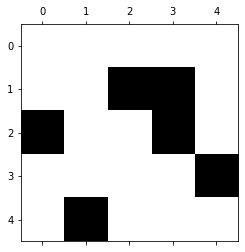

In [53]:
# initialize_all_matrices(maze_size,p)
# plt.spy(full_grid_world_matrix)

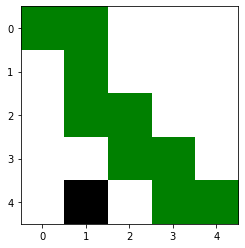

In [54]:
# shortest_path_agent3,traj_length, num_calls_processed = agent3()
# print("shortest path: ",shortest_path)
# display2(shortest_path_agent3,agent_gridworld)